<a href="https://colab.research.google.com/github/nkharlamova/ML/blob/main/HW_5_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Build a linear regression model**

**Dataset https://archive.ics.uci.edu/ml/datasets/wine+quality**

Mandatory steps:

1. Initial data analysis (check for missing values, presence of categorical features, ...)
2. Feature engineering (create 1-2 new features)
3. Feature scaling
4. Split the dataset into training and testing parts
5. Train a baseline model with default hyperparameters
6. Hyperparameter tuning
7. Evaluation of results"

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt

**Loading the dataset of red wine.**

In [ ]:
# Завантажуємо датасет по червоному вину

url1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df_red_wine = pd.read_csv(url1, sep=';')
df_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Let'a take a look at the list of columns and the data they contain.**

In [ ]:
# Дивимося перелік колонок та які дані вони містять:

df_red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**We can see that all columns are numeric and there are no missing values.**

In [ ]:
# Бачимо, що всі колонки числові, пропущених значень немає

**Loading the dataset of white wine.**

In [ ]:
# Тепер завантажуємо датасет по білому вину

url2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df_white_wine = pd.read_csv(url2, sep=';')
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Let's take a look at the list of columns and the data they contain.**

In [ ]:
# Дивимося перелік колонок та які дані вони містять:

df_white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**We can see as well that all columns are numeric and there are no missing values.**

In [ ]:
# Тут також бачимо, що всі колонки числові і пропущені значення відсутні

**Let's consider the correlation matrix of the indicators for red wine.**

<Axes: >

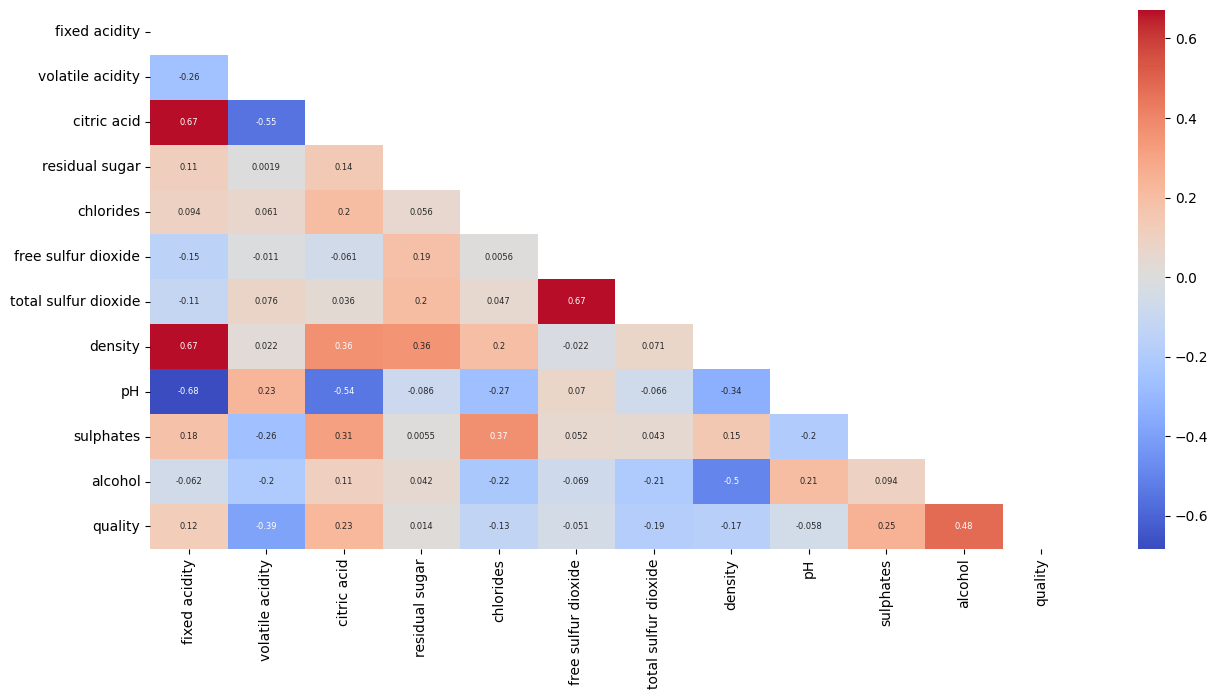

In [ ]:
# Розглянемо матрицю кореляцій показників червоного вина

corr_df_red_wine = df_red_wine.corr()
plt.figure(figsize=(15, 7))
matrix = np.triu(corr_df_red_wine.corr())
sns.heatmap(corr_df_red_wine, cmap="coolwarm", annot=True, annot_kws={"fontsize":6}, center= 0, mask=matrix)


**Let's build the same correlation matrix for the indicators of white wine.**

<Axes: >

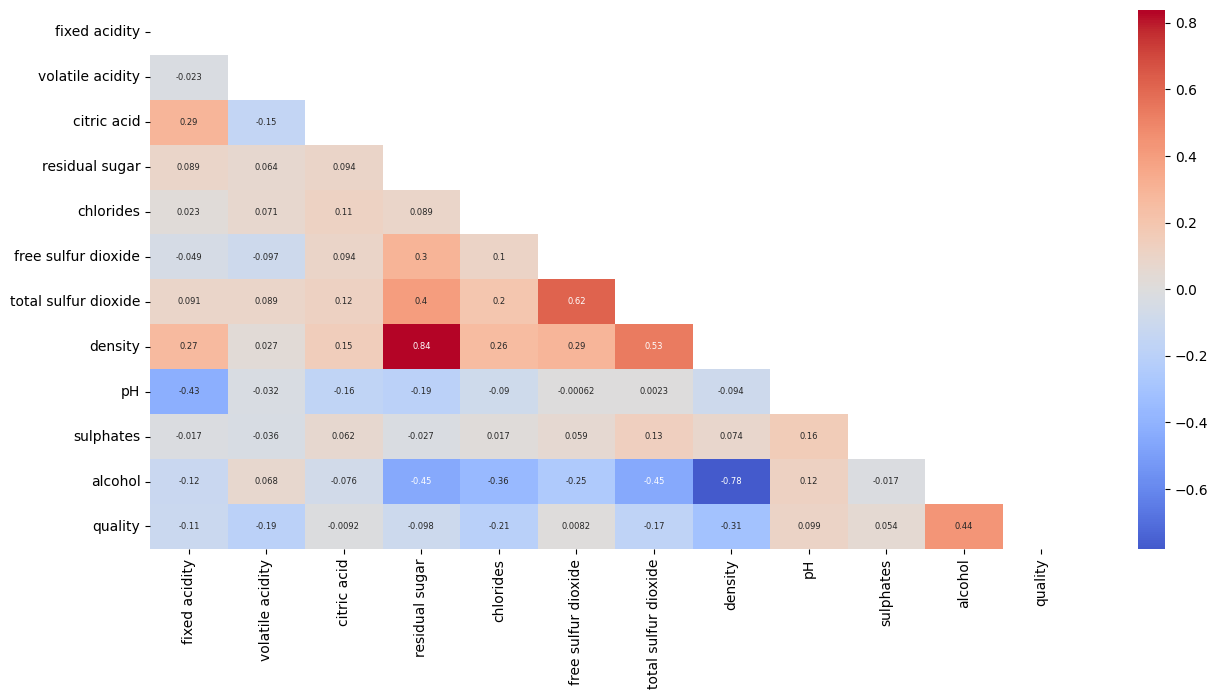

In [ ]:
# Побудуємо таку ж матрицю кореляцій для показників білого вина

corr_df_white_wine = df_white_wine.corr()
plt.figure(figsize=(15, 7))
matrix = np.triu(corr_df_white_wine.corr())
sns.heatmap(corr_df_white_wine, cmap="coolwarm", annot=True, annot_kws={"fontsize":6}, center= 0, mask=matrix)


**There are no values close to 1 in either dataset. The highest correlation coefficient for red wine is 0.67 and for white wine it is 0.84, but there are very few such correlations. When examining both matrices, special attention is paid to the correlation of indicators with the target variable (quality). It can be noted that the correlations between the same chemical properties and the target differ between white and red wines. For example, citric acid has a correlation of 0.23 for red wine and -0.0095 for white wine. So the quality of the two types of wine depends on different indicators. Therefore, we can conclude that quality analysis and models should be done separately for each type of wine.**

In [ ]:
# Значень близьких до одиниці в обох датасетах немає, у червоного вина найвищий показник кореляції 0.67, у білого - 0.84,
# та й таких показників дуже мало.
# Розглядаючи обидві матриці звертаємо особливу увагу на кореляцію показників з таргетом (quality).
# Можна помітити, що показники взаємозв'язку між однаковими хімічними властивостями і таргетом у білого і червоного вина відрізняються:
# Наприклад, citric acid складає для червоного вина 0.23, а для білого -0.0095. Тобто, якість двох сортів вина залежить від різних показників
# Таким чином, можемо зробити висновок, що аналіз якості, як і моделі, мають бути для кожного сорту вина окремо

**Let's take a look at the target values in both datasets**

**red wine:**

In [ ]:
# Подивимось значення таргету в обох датасетах:
# червоне вино

df_red_wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

**white wine:**

In [ ]:
# і біле вино

df_white_wine.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

**We see that in both datasets, most wines have average ratings with scores of 5, 6, and 7. The highest score of 9 is only present in white wine, but the number of such wines is minimal. Wines with ratings of 1 and 2 are absent in both datasets. Additionally, we observe that the number of higher quality wines is greater in the second dataset - white wines. Therefore, we will proceed to examine it further.**

In [ ]:
# Бачимо, що в обох датасетах більшість вин мають середні значення з показниками 5, 6 та 7. Найвищий показник 9 є тільки у білого вина, але
# кількість таких вин мінімальна. Якість з показниками 1 і 2 відсутня в обох датасетах. Також бачимо, що кількість якісніших вин більша
# все ж таки в другому датасеті - білі вина, тож надалі його і розглянемо.

**Let's try to add a new feature based on fixed acidity and volatile acidity - total acidity.**

In [ ]:
# Спробуємо додати нову фічу на основі fixed acidity і volatile acidity - загальну кислотність

df_white_wine.insert(2, "total_acidity", df_white_wine["fixed acidity"] + df_white_wine["volatile acidity"])


**Adding normalized acidity based on pH and total acidity (total_acidity).**

In [ ]:
# Тепер додаємо нормалізовану кислотність на основі pH та загальної кислотності (total_acidity)

df_white_wine.insert(3, "normalized_acidity", df_white_wine["total_acidity"] / df_white_wine["pH"])

**And let's also add the ratio of sulphates to chlorides, which can also influence the wine quality.**

In [ ]:
# І додамо ще співвідношення сульфатів (sulphates) до хлоридів (chlorides), що також може впливати на якість вина

df_white_wine.insert(13, "sulphates_to_chlorides", df_white_wine["sulphates"] / df_white_wine["chlorides"])


**Let's check what we got.**

In [ ]:
# Перевіряємо, що в нас вийшло

df_white_wine.head()

,fixed acidity,volatile acidity,total_acidity,normalized_acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,sulphates_to_chlorides,quality
0,7.0,0.27,7.27,2.423333,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,10.000000,6
1,6.3,0.30,6.60,2.000000,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,10.000000,6
2,8.1,0.28,8.38,2.570552,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,8.800000,6
3,7.2,0.23,7.43,2.329154,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.896552,6
4,7.2,0.23,7.43,2.329154,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.896552,6


**Let's take a closer look at the statistical metrics:**

In [ ]:
# Подивимось більш детально статистичні показники:

df_white_wine.describe()

,fixed acidity,volatile acidity,total_acidity,normalized_acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,sulphates_to_chlorides,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,7.133029,2.247578,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,11.949031,5.877909
std,0.843868,0.100795,0.847592,0.326938,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,4.600121,0.885639
min,3.800000,0.080000,4.110000,1.096000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,1.594684,3.000000
25%,6.300000,0.210000,6.570000,2.034508,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,9.047619,5.000000
50%,6.800000,0.260000,7.070000,2.219592,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,11.136364,6.000000
75%,7.300000,0.320000,7.590000,2.440367,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,14.000000,6.000000
max,14.200000,1.100000,14.470000,4.593651,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,47.142857,9.000000


**Building a distribution plot of the target variable.**

<Axes: xlabel='quality', ylabel='count'>

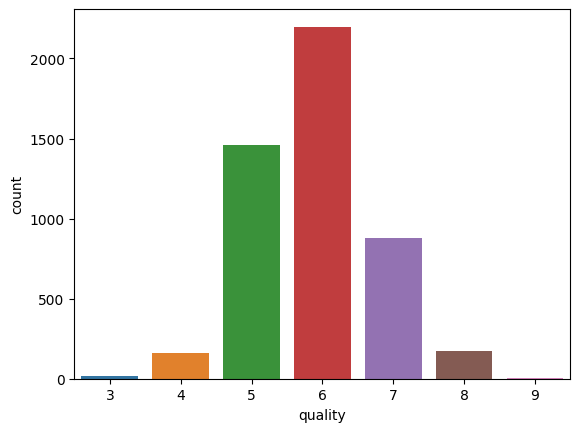

In [ ]:
# Побудуємо графік розподілу таргету:

sns.countplot(data=df_white_wine, x="quality")

**The distribution is more or less normal, but we observe a significant gap between the mean values of the target and the extremes on both sides. Unfortunately, we have very few data points for the extreme values, so it might be challenging to analyze them qualitatively.**

In [ ]:
# Розподіл більш-менш нормальний, але бачимо великий розрив між середніми значеннями таргету і крайніми з обох сторін.
# Нажаль, маємо дуже мало даних по "крайнім" значенням, можна припустити, що дослідити їх якісно не вийде

**Let's separately display the sorted correlation between the independent variable (quality) and the dependent variables.**

In [ ]:
# Відобразимо окремо відсортовану кореляцію між незалежною (quality) та залежними змінними

corr_with_quality = df_white_wine.corr().quality.sort_values(ascending=False, key = lambda x: abs(x)).to_frame()
corr_with_quality.drop("quality")

,quality
alcohol,0.435575
density,-0.307123
sulphates_to_chlorides,0.262614
chlorides,-0.209934
volatile acidity,-0.194723
total sulfur dioxide,-0.174737
normalized_acidity,-0.143740
total_acidity,-0.136320
fixed acidity,-0.113663
pH,0.099427


**We can see that there are no correlation values close to 1 with the target (quality), but there are moderate correlation values with alcohol, density, sulphates_to_chlorides, and chlorides. Additionally, it's worth noting that the new feature, sulphates_to_chlorides, correlates more with the target than those variables upon which it was created.**

In [ ]:
# Бачимо, що значень зв'язку з таргетом (quality) близьких до одиниці немає, але є середні значення кореляції з alcohol, density,
# sulphates_to_chlorides та chlorides. Також можна відмітити, що наша нова фіча sulphates_to_chlorides корелює з таргетом більше,
# ніж ті, на основі яких вона була створена

**Saving the feature names into a separate list:**

In [ ]:
# Збережемо назви фіч, в окремий список:
features = corr_with_quality[abs(corr_with_quality.quality) > 0.05].index.tolist()
features

['quality',
 'alcohol',
 'density',
 'sulphates_to_chlorides',
 'chlorides',
 'volatile acidity',
 'total sulfur dioxide',
 'normalized_acidity',
 'total_acidity',
 'fixed acidity',
 'pH',
 'residual sugar',
 'sulphates']


**Building a pairplot to visualize the relationships between variables.**

In [ ]:
# Побудуємо pairplot, щоб побачити взаємозв'язки між змінними.

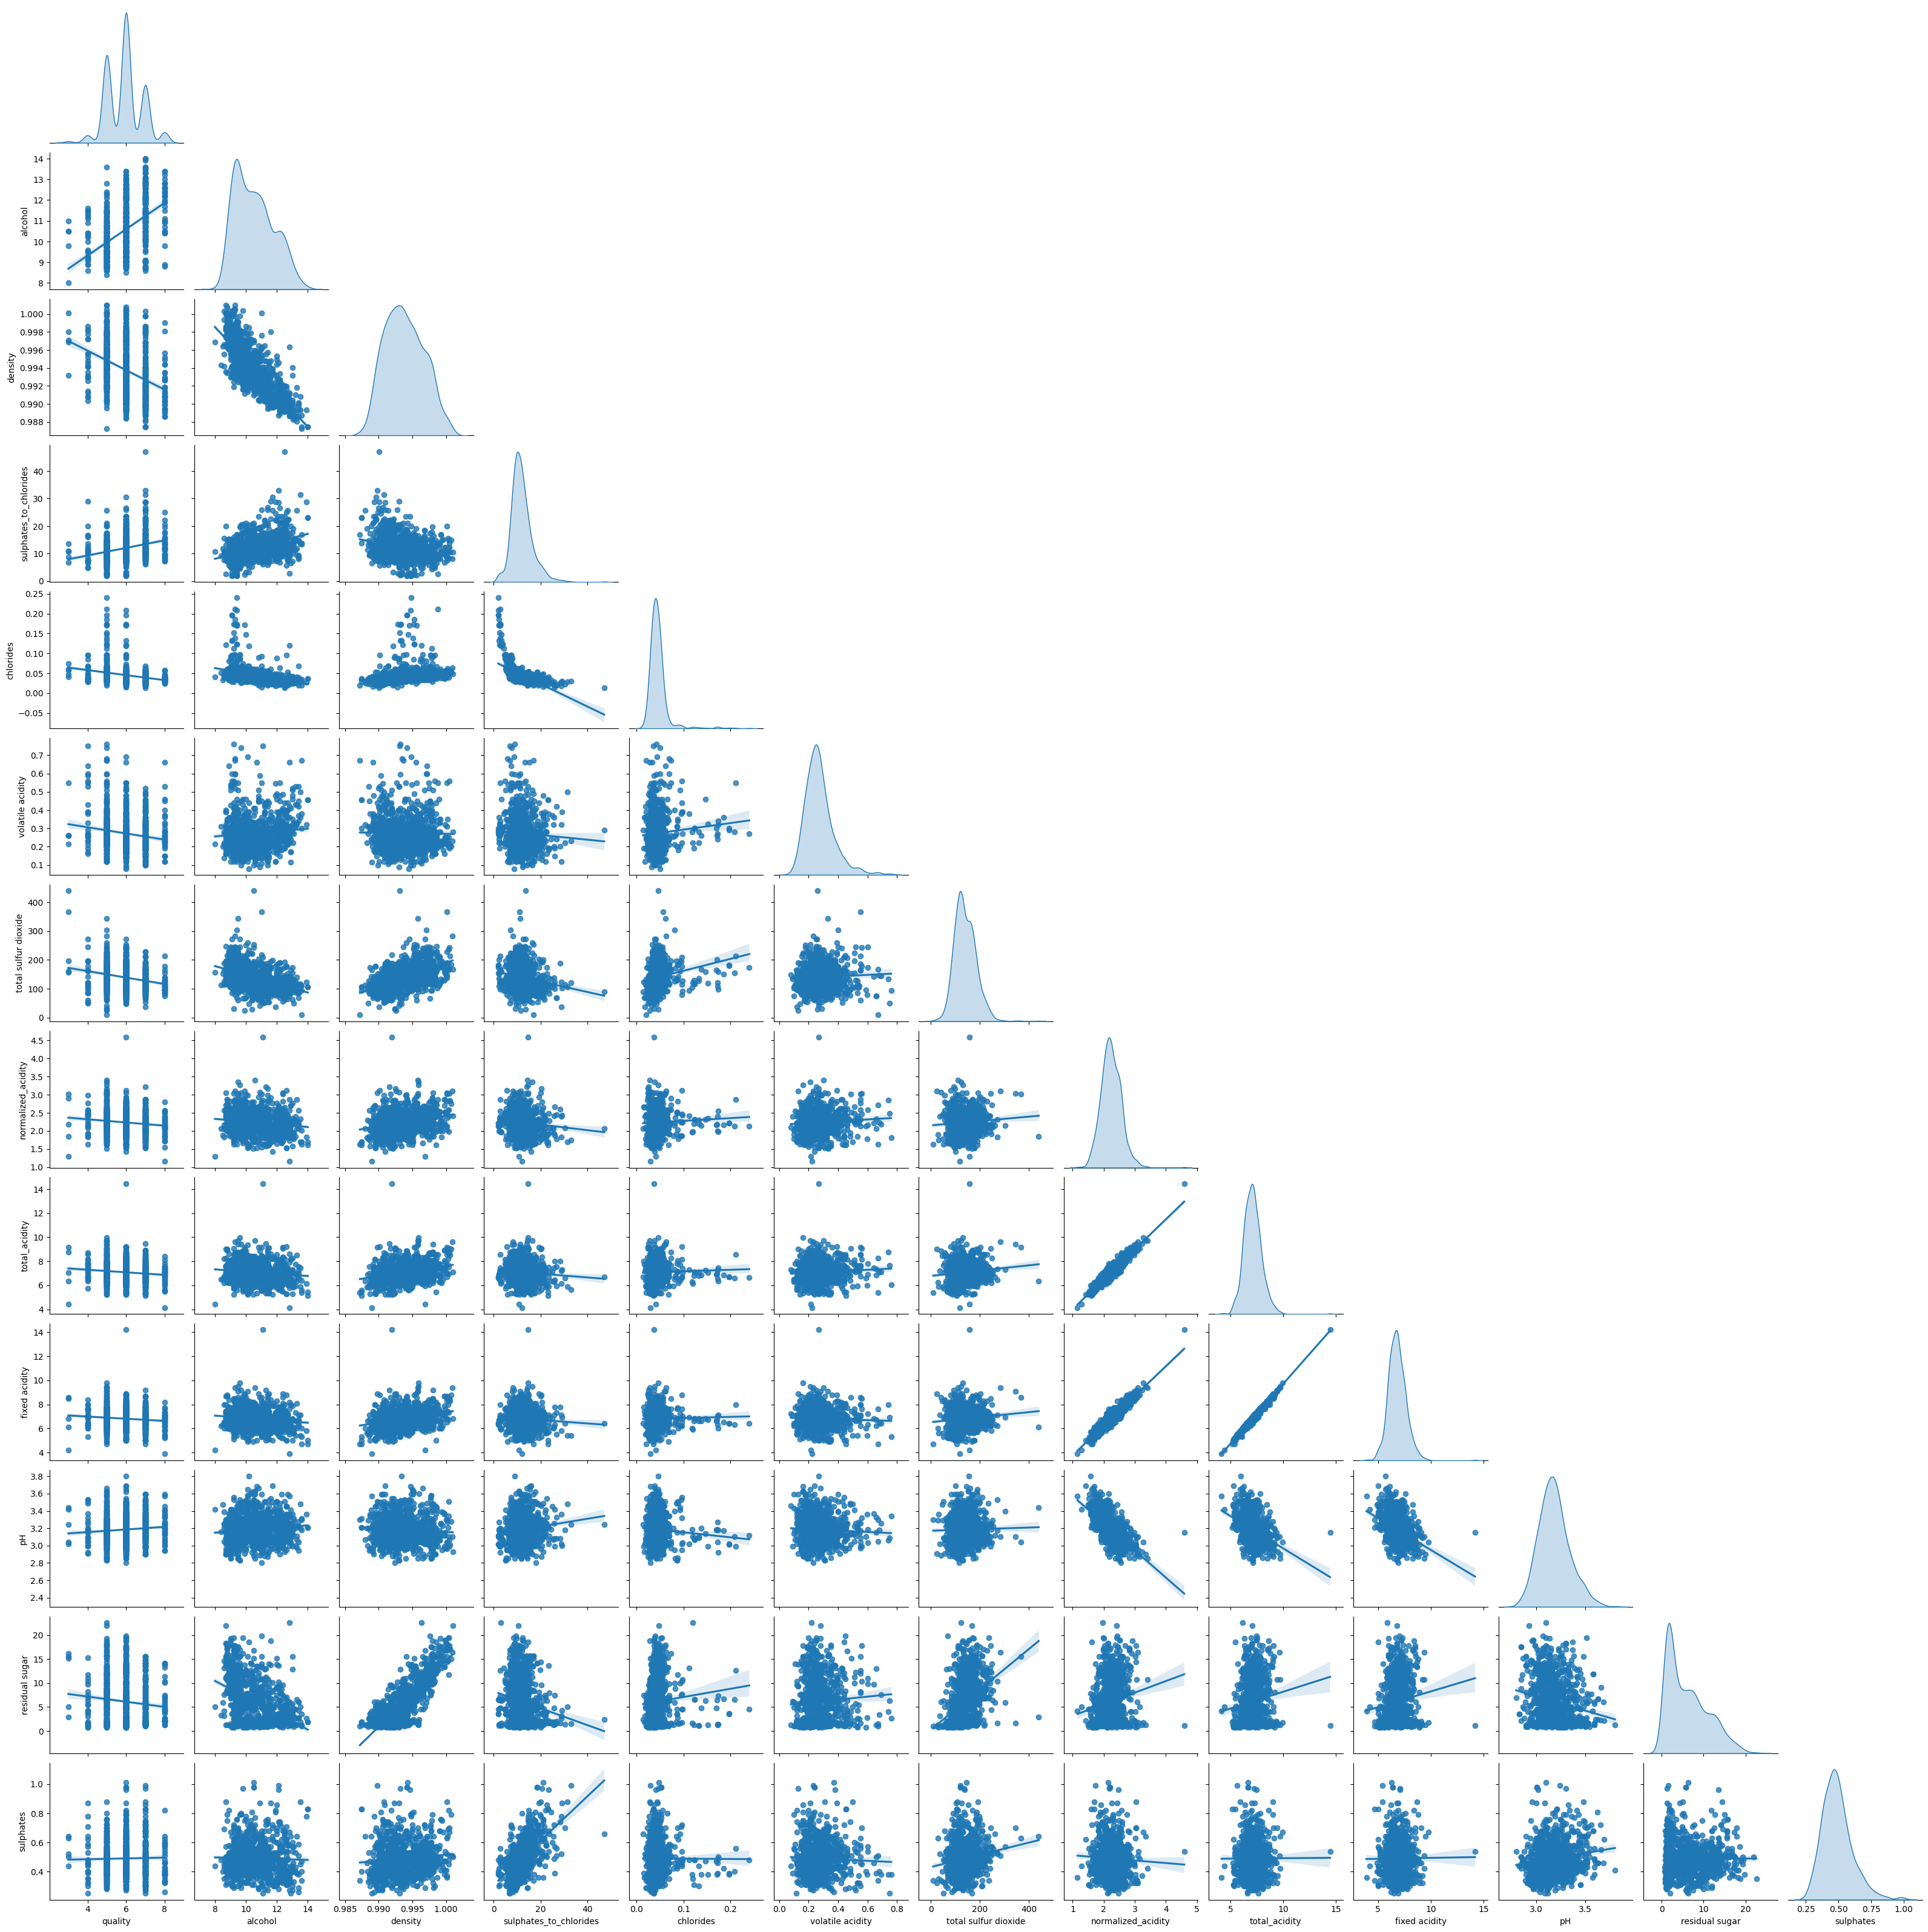

In [ ]:
sns.pairplot(df_white_wine[features].sample(frac=0.2, random_state=42), corner=True, kind='reg', diag_kind='kde')

**Additionally, we will construct a series of boxplots.**

<Figure size 400x300 with 0 Axes>

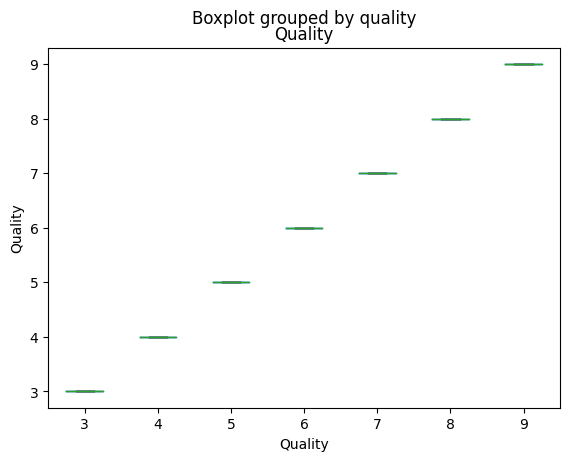

<Figure size 400x300 with 0 Axes>

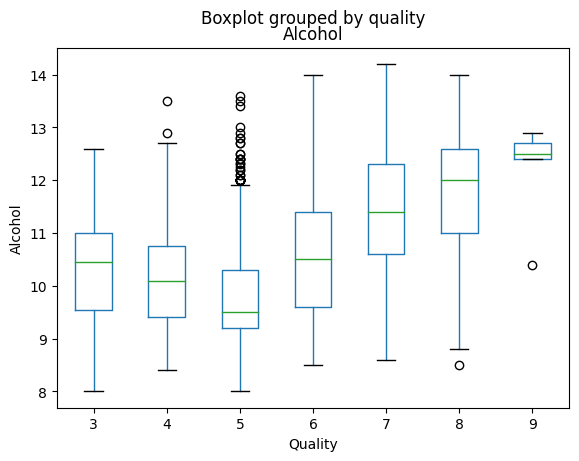

<Figure size 400x300 with 0 Axes>

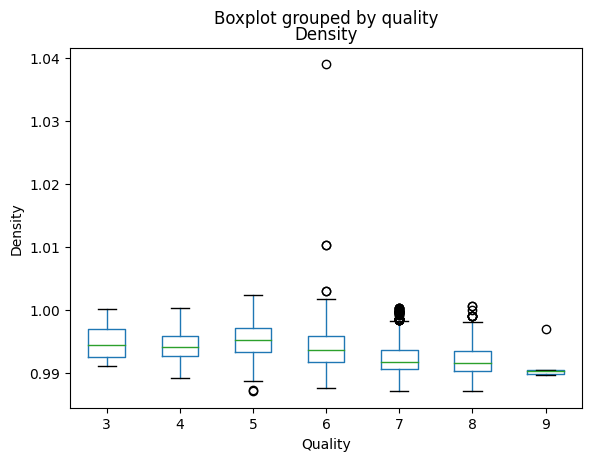

<Figure size 400x300 with 0 Axes>

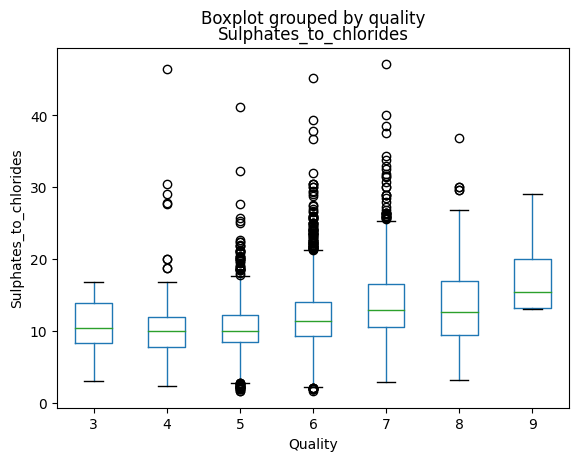

<Figure size 400x300 with 0 Axes>

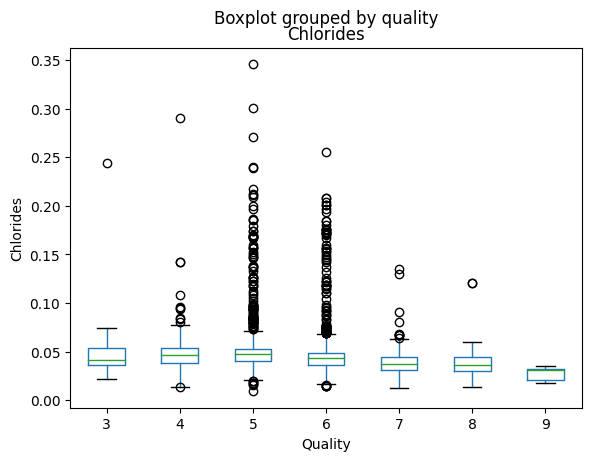

<Figure size 400x300 with 0 Axes>

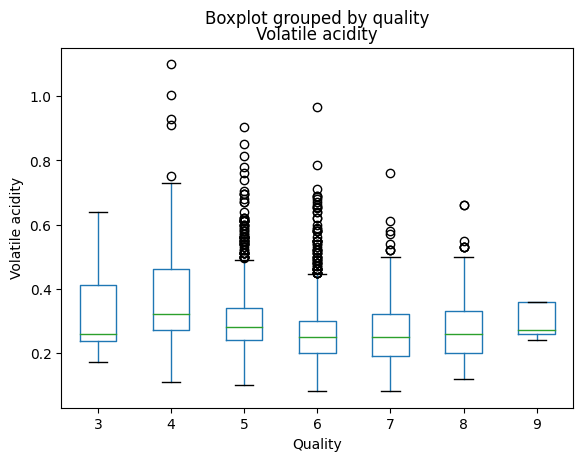

<Figure size 400x300 with 0 Axes>

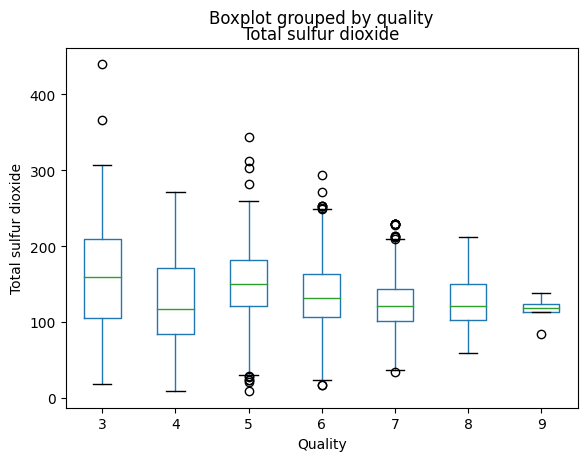

<Figure size 400x300 with 0 Axes>

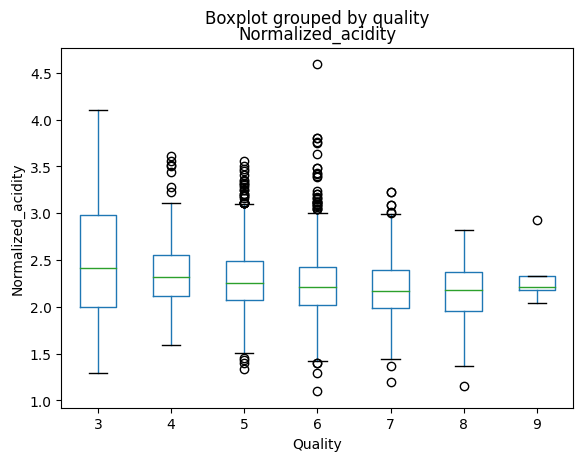

<Figure size 400x300 with 0 Axes>

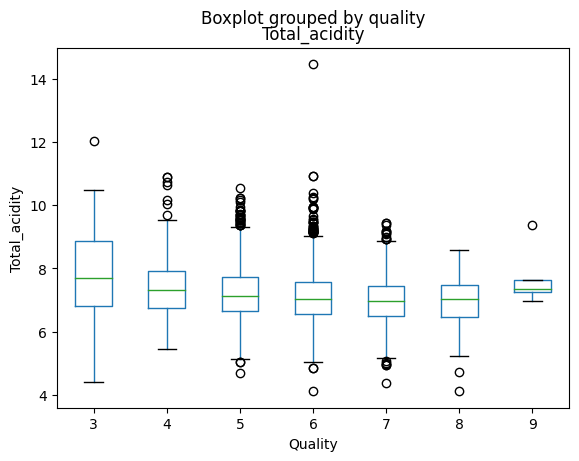

<Figure size 400x300 with 0 Axes>

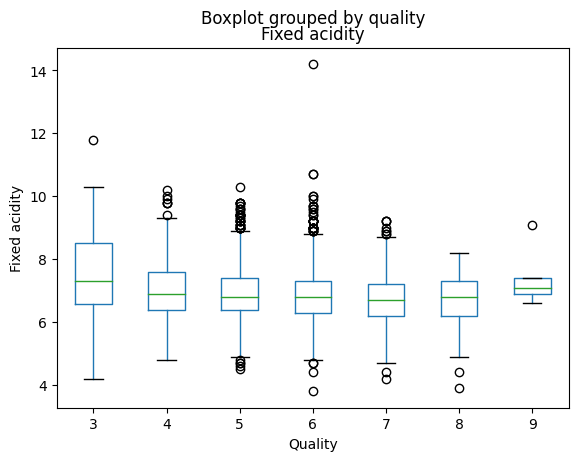

<Figure size 400x300 with 0 Axes>

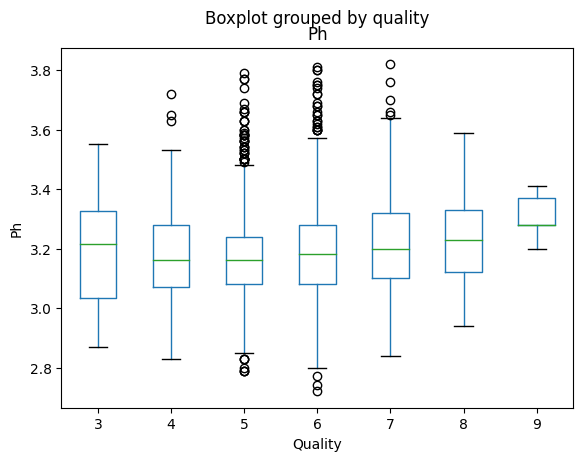

<Figure size 400x300 with 0 Axes>

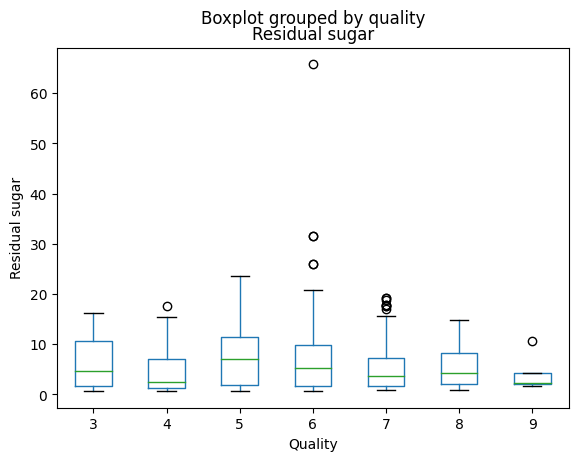

<Figure size 400x300 with 0 Axes>

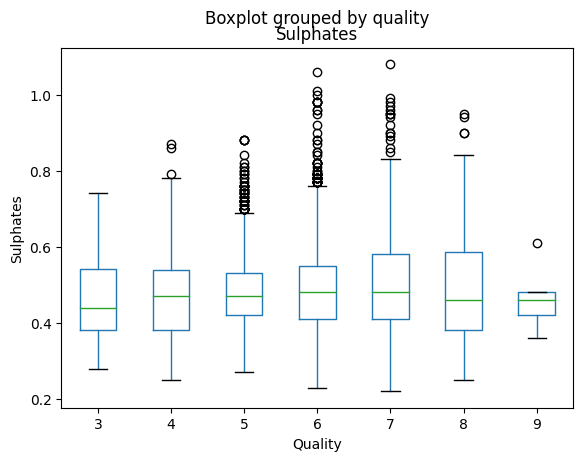

In [ ]:
# Будуємо додатково серію боксплотів

for column in features:
    plt.figure(figsize=(4, 3))
    df_white_wine.boxplot(column=column, by="quality", grid=False)
    plt.title(f"{column.capitalize()}")
    plt.xlabel("Quality")
    plt.ylabel(column.capitalize())

    plt.show()

**For example, it can be noticed that most high-quality wines have a higher alcohol content. A similar situation occurs with the ratio of sulphates to chlorides. However, density, on the contrary, should be lower. We also observe that despite the low correlation for some indicators, quadratic dependencies are present.**

In [ ]:
# Можна помітити, наприклад, що більшість якісних вин мають вищий показник алкоголю,
# таку ж ситуацію маємо з співвідношенням сульфатів до хлоридів. А от густина (density) навпаки, має бути нижче.
# Також бачимо, що не дивлячись на низьку кореляцію по деяким показникам, спостерігаються квадратичні залежності.

**Splitting the dataset into a feature matrix.**

In [ ]:
# Розділяємо датасет на матрицю фіч

X = df_white_wine.drop("quality", axis=1)
y = df_white_wine["quality"]

**Scaling the features.**

In [ ]:
# Масштабуємо фічі

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Splitting the dataset into training and testing parts.**

In [ ]:
# Розділяємо датасет на тренувальну та тестову частини

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42, stratify=y)

**Creating a linear regression model, performing cross-validation and training the model on the training data.**


**The next step, we calculate the evaluation on the training and testing samples, and we examine the evaluation across folds as well as on the training and testing sets.**

In [ ]:
# creating a linear regression model
#  Будуємо модель лінійної регресії
model = LinearRegression()

# cross-validation
# Робимо крос-валідацію:
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# training the model on the training data
# Тренуємо модель на тренувальних даних:
model.fit(X_train, y_train)

# calculating the evaluation on the training and testing samples
# Розраховуємо оцінку на тренувальній та тестовій вибірці:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# print the scores:
# Дивимося оцінку по фолдам а також по тренувальній та тестовій виборкам:
print("Cross-Validation Scores:", cv_scores)
print("Train Score:", train_score)
print("Test Score:", test_score)

Cross-Validation Scores: [0.28456943 0.26723793 0.18713863 0.31028038 0.34331896]
Train Score: 0.2928009510377175
Test Score: 0.26430316688908795


**We observe that the evaluation across 5 folds shows minor discrepancies, typically within the range of 0.1-0.2, which are not critical as far as I understand. The evaluations on the training and testing samples are within normal parameters. We can conclude that our model generalizes well to the data and exhibits sufficient stability.**

In [ ]:
# Бачимо, що оцінка по 5 фолдам у нас вийшла з невеликими розбіжностями, наскільки я розумію, розбіжності 0.1-0.2 не є критичними.
# Оцінки на тренувальній та тестовій виборках мають нормальні показники. Можемо зробити висновок, що наша модель добре узагальнює дані
# і є достатньо стабільна.


**Let's take a look at the metrics**

In [ ]:
# Подивимося тепер на метрики

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

mse_train = mean_squared_error(y_train, train_predict)
mse_test = mean_squared_error(y_test, test_predict)

r2_train = r2_score(y_train, train_predict)
r2_test = r2_score(y_test, test_predict)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")
print(f"Train RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")
print(f"Train R2 Score: {r2_train}")
print(f"Test R2 Score: {r2_test}")

Train MSE: 0.5547018775605944
Test MSE: 0.5766754075881081
Train RMSE: 0.7447831077304281
Test RMSE: 0.7593914718958253
Train R2 Score: 0.2928009510377175
Test R2 Score: 0.26430316688908795


**We can see that the metrics are at a normal level. The errors on the testing sample are slightly higher than on the training sample, indicating that the model is trained within acceptable limits.**

In [ ]:
# Бачимо, що метрики знаходяться на нормальному рівні,
# помилки на тестовій виборці трохи більші ніж на тренувальній, а значить модель натренована в межах норми

**The next steps:**

In [ ]:
# using elastic_net regularization
# Використаємо elastic_net регуляризацію
elastic_net = ElasticNet()

pipeline = make_pipeline(StandardScaler(), elastic_net)

# tuning the parameters
# Підбираємо параметри
param_grid = {
    'elasticnet__alpha': np.linspace(0.001, 2, 100),
    'elasticnet__l1_ratio': np.linspace(0.01, 0.99, 100),
}

# creating and training a grid_search object
# Створюємо об'єкт grid_search та навчаємо його на тренувальних даних:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# obtaining the best parameters and the best model
# Отримуємо найкращі параметри і найкращу модель
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# evaluating the best model on training and testing data
# Оцінюємо кращу модель на тренувальних та тестувальних даних
train_predict = best_model.predict(X_train)
test_predict = best_model.predict(X_test)

# calculating the metrics
# Розраховуємо метрики
mse_train = mean_squared_error(y_train, train_predict)
mse_test = mean_squared_error(y_test, test_predict)

r2_train = r2_score(y_train, train_predict)
r2_test = r2_score(y_test, test_predict)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# print the results
# Роздрукуємо результати
print(f"Best Parameters: {best_params}")
print(f"MSE_train: {mse_train}")
print(f"MSE_test: {mse_test}")
print(f"R2_train: {r2_train}")
print(f"R2_test: {r2_test}")
print(f"RMSE_train: {rmse_train}")
print(f"RMSE_test: {rmse_test}")

Best Parameters: {'elasticnet__alpha': 0.021191919191919192, 'elasticnet__l1_ratio': 0.01}
MSE_train: 0.5563881679190237
MSE_test: 0.5791121681988904
R2_train: 0.2906510701990229
R2_test: 0.2611944560947438
RMSE_train: 0.7459143167408866
RMSE_test: 0.7609941972176203


**The metrics remained approximately at the same level. We can conclude that regularization did not help.**

In [ ]:
# Метрики залишились приблизно на тому ж рівні. Можна зробити висновок, що регуляризація не допомогла.

**Let's visualize our results using a density plot.**

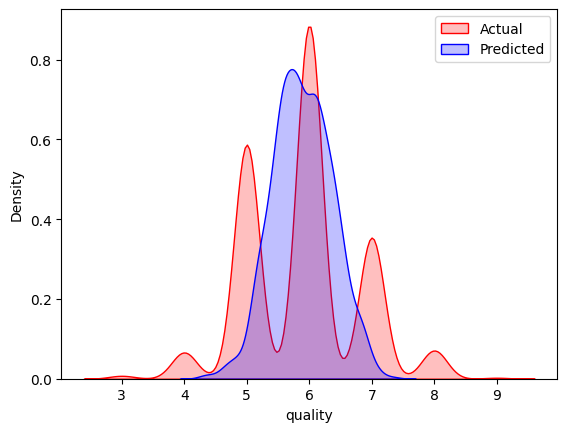

In [ ]:
# Візуалізуємо наші результати за допомогою графіка щільності:

sns.kdeplot(y_test, fill=True, color='r', label='Actual')
sns.kdeplot(model.predict(X_test), fill=True, color='b', label='Predicted')

plt.legend()


**CONCLUSION: we see that the predicted model covers average target values ranging from 5 to 7. Due to the lack of sufficient data on extreme positions on both sides, it can be said that the model cannot perform well.**

In [ ]:
# Висновок: бачимо, що прогнозована модель охоплює середні значення таргету - від 5 до 7. Через відсутність достатньої кількості даних
# по крайнім позиціям з обох боків, можна сказати, що модель не може працювати якісно.